In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,accuracy_score
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
dataset=pd.read_csv("Laptops.csv")
dataset2=pd.read_csv("Laptops.csv")
dataset.head()

,Unnamed: 0,Brand,Model Name,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen,Price
0,0,HP,15s-fq5007TU,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"38,990"
1,1,HP,15s-fy5003TU,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"37,990"
2,2,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"70,990"
3,3,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"70,990"
4,4,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"70,990"


In [3]:
dataset['Brand'].unique()

array(['HP', 'Apple', 'Lenovo', 'ASUS', 'DELL', 'Acer', 'SAMSUNG', 'MSI',
       'Infinix', 'Ultimus', 'CHUWI', 'WINGS', 'ZEBRONICS', 'Primebook',
       'GIGABYTE', 'realme', 'MICROSOFT', 'LG'], dtype=object)

In [4]:
dataset['RAM'].unique()

array(['8 GB', '16 GB', '4 GB', '12 GB', '32 GB', '64 GB', '18 GB'],
      dtype=object)

In [5]:
len(dataset['Model Name'].unique())

377

In [6]:
dataset['Storage'].unique()

array(['512 GB', '256 GB', nan, '1 TB', '2 TB', '4 TB', '128 GB', '64 GB',
       '3 TB', '6 TB'], dtype=object)

# Data Analysis
1. Changed The Datatypes


In [7]:
dataset.isnull().sum()

Unnamed: 0           0
Brand                0
Model Name           0
Processor            0
Operating System     0
Storage             12
RAM                  0
Screen Size          0
Touch_Screen         0
Price                0
dtype: int64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        837 non-null    int64 
 1   Brand             837 non-null    object
 2   Model Name        837 non-null    object
 3   Processor         837 non-null    object
 4   Operating System  837 non-null    object
 5   Storage           825 non-null    object
 6   RAM               837 non-null    object
 7   Screen Size       837 non-null    object
 8   Touch_Screen      837 non-null    object
 9   Price             837 non-null    object
dtypes: int64(1), object(9)
memory usage: 65.5+ KB


In [9]:
dataset['Storage']=dataset['Storage'].str.replace("GB","")
dataset['Storage']=dataset['Storage'].str.replace("TB","")

In [10]:
dataset['Storage'].unique()

array(['512 ', '256 ', nan, '1 ', '2 ', '4 ', '128 ', '64 ', '3 ', '6 '],
      dtype=object)

In [11]:
memory=[1, 2, 4,3,6]
dataset['Storage']=pd.to_numeric(dataset['Storage'])
dataset['Storage'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 837 entries, 0 to 836
Series name: Storage
Non-Null Count  Dtype  
--------------  -----  
825 non-null    float64
dtypes: float64(1)
memory usage: 6.7 KB


In [12]:
for i in memory:
    dataset.loc[dataset["Storage"] == i, "Storage"] = 1000*i
dataset['Storage'].unique()

array([ 512.,  256.,   nan, 1000., 2000., 4000.,  128.,   64., 3000.,
       6000.])

In [13]:
dataset['RAM']=dataset['RAM'].str.replace("GB","")
dataset['RAM']=pd.to_numeric(dataset['RAM'])

In [14]:
dataset['Screen_Size']=dataset['Screen Size'].str.split().str[0]
dataset['Screen_Size']=pd.to_numeric(dataset['Screen_Size'])

In [15]:
dataset['Screen_Size'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 837 entries, 0 to 836
Series name: Screen_Size
Non-Null Count  Dtype  
--------------  -----  
837 non-null    float64
dtypes: float64(1)
memory usage: 6.7 KB


In [16]:
dataset.drop(columns=['Screen Size'],inplace=True)


In [17]:
dataset['Price']=dataset['Price'].str.replace(",","")
dataset['Price']=pd.to_numeric(dataset['Price'])

In [18]:
dataset.drop(columns=['Unnamed: 0'],inplace=True)

In [19]:
dataset.head()

,Brand,Model Name,Processor,Operating System,Storage,RAM,Touch_Screen,Price,Screen_Size
0,HP,15s-fq5007TU,Core i3,Windows 11 Home,512.0,8,No,38990,39.62
1,HP,15s-fy5003TU,Core i3,Windows 11 Home,512.0,8,No,37990,39.62
2,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256.0,8,No,70990,33.78
3,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256.0,8,No,70990,33.78
4,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256.0,8,No,70990,33.78


In [20]:
categorical_features=[features for features in dataset.columns if dataset[features].dtypes == "O"]
categorical_features

['Brand', 'Model Name', 'Processor', 'Operating System', 'Touch_Screen']

In [21]:
numerical_features=[features for features in dataset.columns if dataset[features].dtypes != "O"]
numerical_features

['Storage', 'RAM', 'Price', 'Screen_Size']

In [22]:
discrete_features=[feature for feature in numerical_features if (len(dataset[feature].unique())<25)]
discrete_features

['Storage', 'RAM']

In [23]:
continous_features=[feature for feature in numerical_features if feature not in discrete_features ]
continous_features

['Price', 'Screen_Size']

In [24]:
dataset['Screen_Size']

0      39.62
1      39.62
2      33.78
3      33.78
4      33.78
       ...  
832    39.62
833    35.56
834    43.94
835    39.62
836    33.78
Name: Screen_Size, Length: 837, dtype: float64

In [25]:
dataset['Storage']

0       512.0
1       512.0
2       256.0
3       256.0
4       256.0
        ...  
832     512.0
833    1000.0
834    4000.0
835     512.0
836     512.0
Name: Storage, Length: 837, dtype: float64

2. Checking Relationship between The discrete_features and price

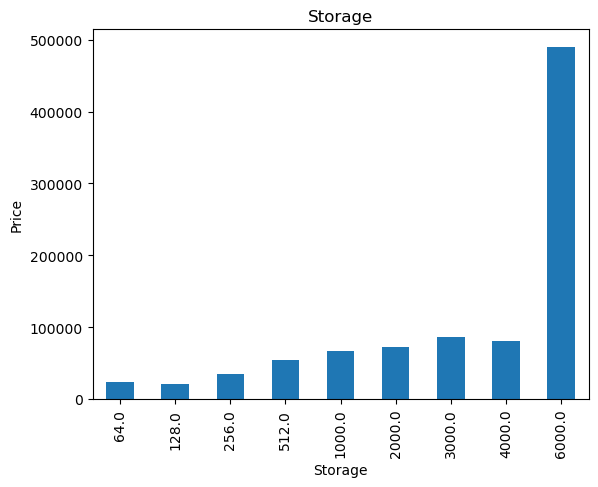

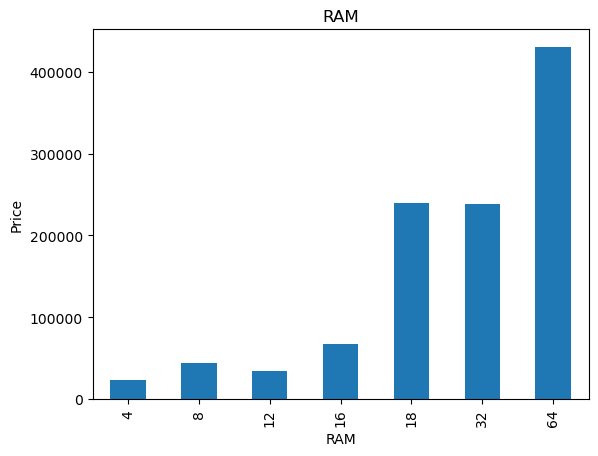

In [26]:
for feature in discrete_features:
    data=dataset.copy()
    dataset.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

3. Checking Relationship between The continous_features and price

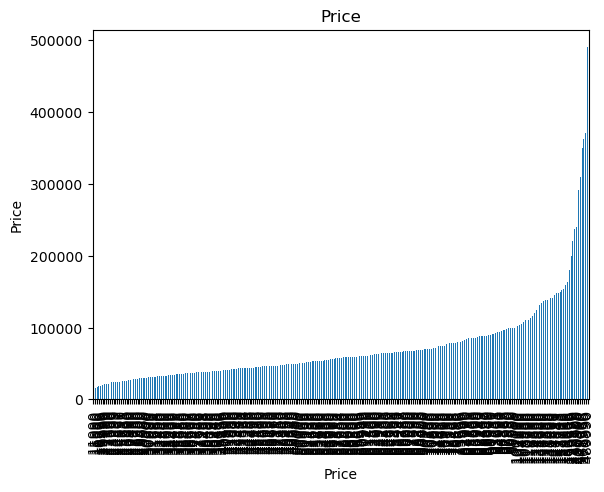

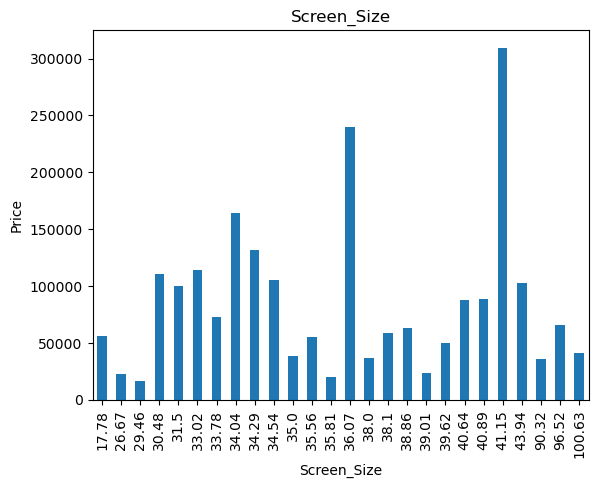

In [27]:
for feature in continous_features:
    data=dataset.copy()
    dataset.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

4. Checking Relationship between The categorical_features and price

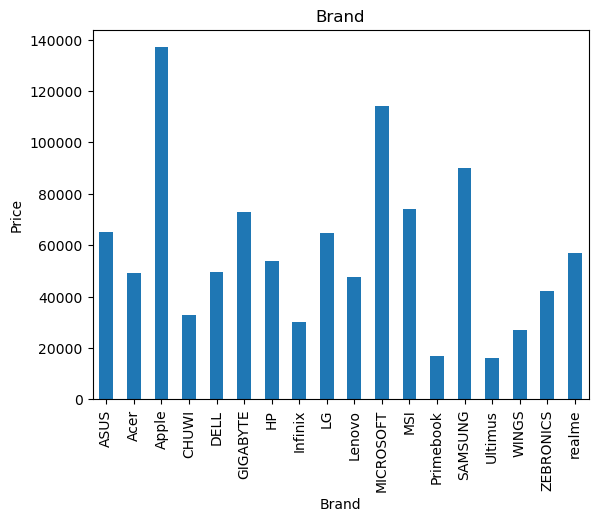

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


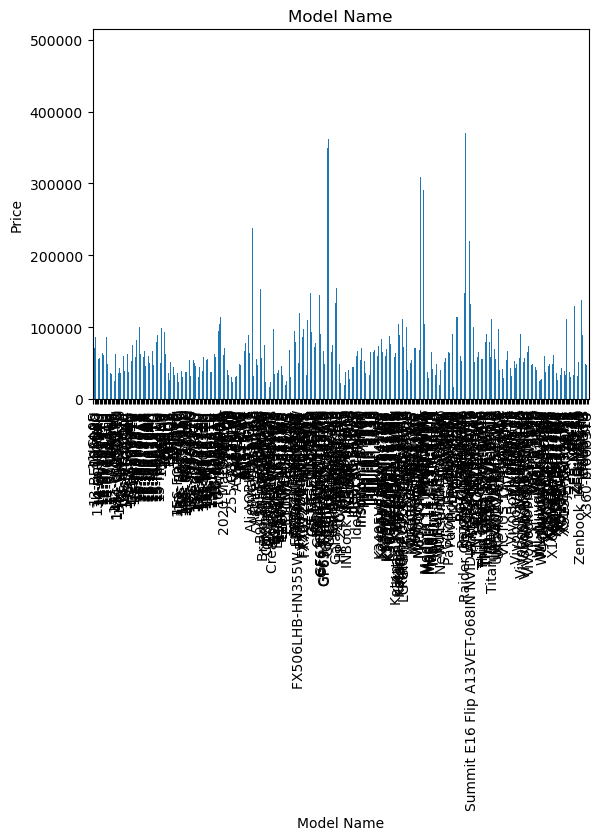

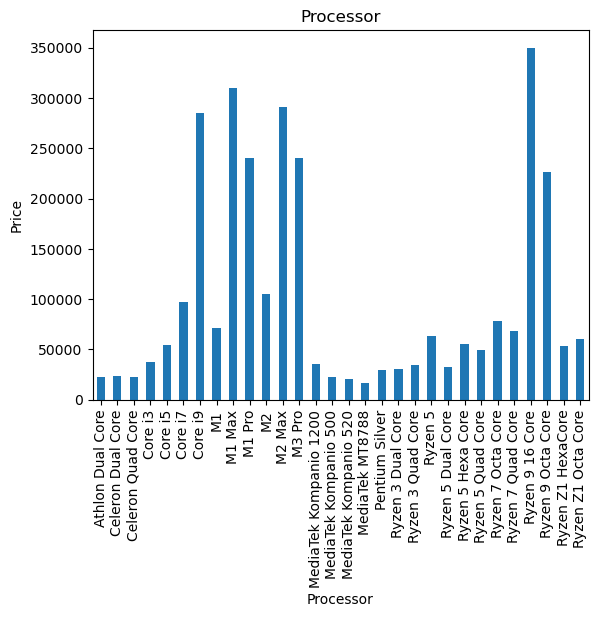

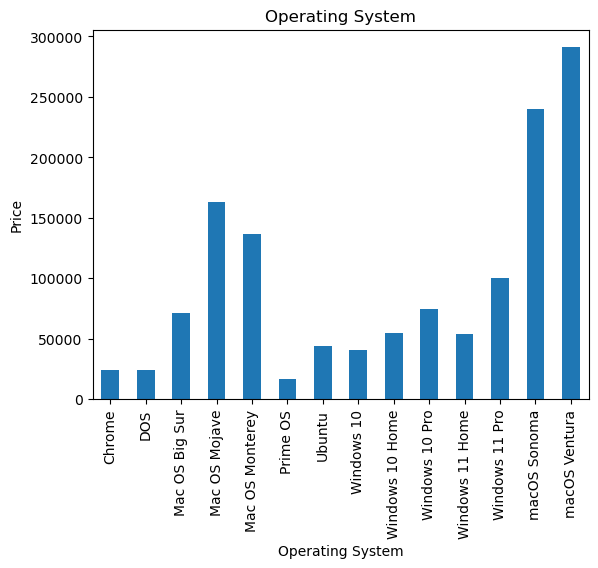

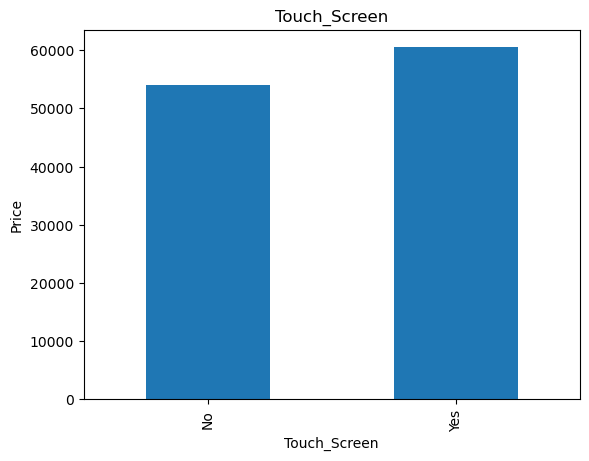

In [28]:
for feature in categorical_features:
    data=dataset.copy()
    dataset.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(feature)
    plt.show()

5. Plotting the continous_features in Histogram to if it is skewed data or not

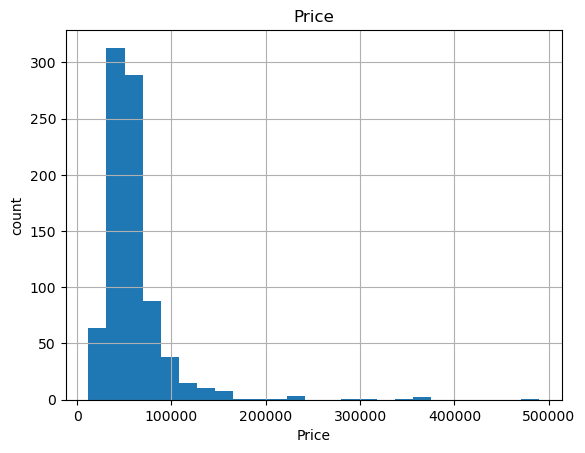

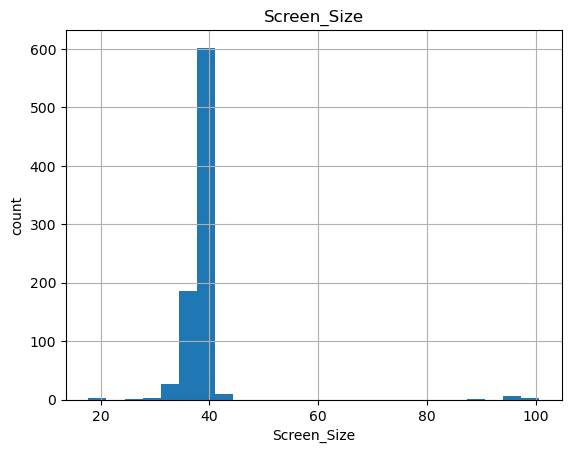

In [29]:
for feature in continous_features:
    data=dataset.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

# Scaling the continous_features using logarithmic techique

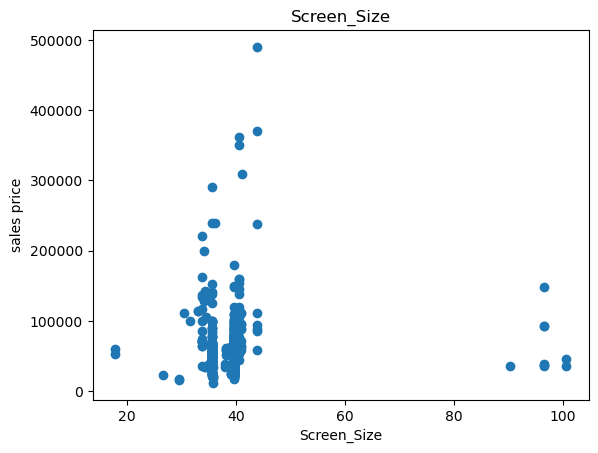

In [30]:
data2=dataset.copy()
plt.scatter(data2['Screen_Size'],data2['Price'])
plt.xlabel('Screen_Size')
plt.ylabel('sales price')
plt.title(feature)
plt.show()

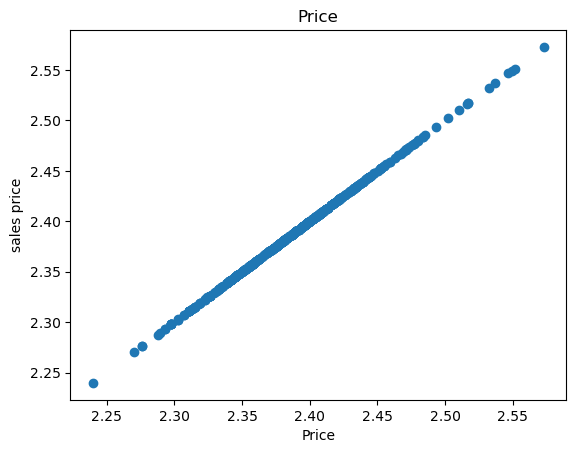

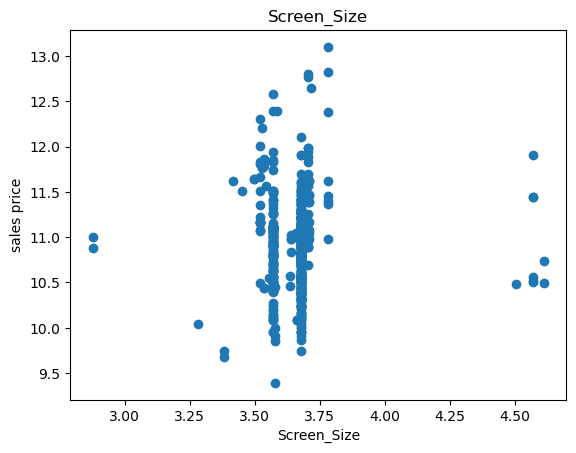

In [31]:
for feature in continous_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Price']=np.log(data['Price'])
        plt.scatter(data[feature],data['Price'])
        plt.xlabel(feature)
        plt.ylabel('sales price')
        plt.title(feature)
        plt.show()

# Checking For Outliers

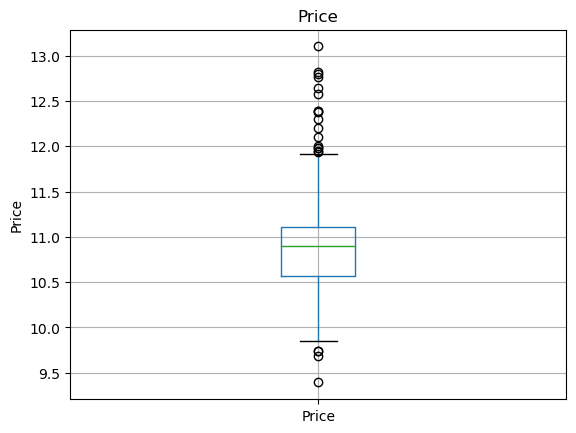

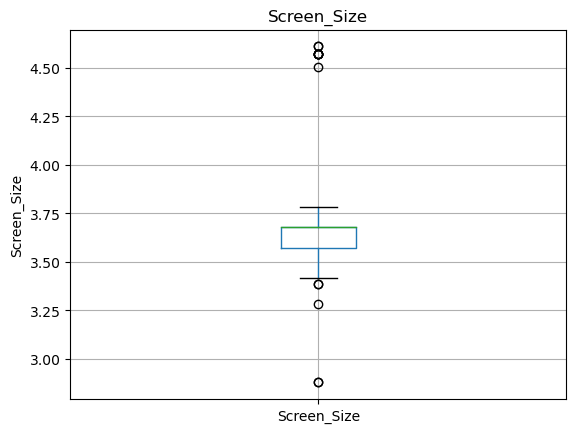

In [32]:
for feature in continous_features:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Removing Null Values By Replacing Median Value

In [33]:
median_value=dataset['Storage'].median()
dataset['Storage'].fillna(median_value,inplace=True)    
dataset['Storage'].isnull().sum()

0

In [34]:
dataset.head(6)

,Brand,Model Name,Processor,Operating System,Storage,RAM,Touch_Screen,Price,Screen_Size
0,HP,15s-fq5007TU,Core i3,Windows 11 Home,512.0,8,No,38990,39.62
1,HP,15s-fy5003TU,Core i3,Windows 11 Home,512.0,8,No,37990,39.62
2,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256.0,8,No,70990,33.78
3,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256.0,8,No,70990,33.78
4,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256.0,8,No,70990,33.78
5,Lenovo,V15 G3 IAP,Core i7,Windows 11 Home,512.0,16,No,49990,39.62


# Scaling Numerical Feature

In [35]:
for feature in numerical_features:
    dataset[feature]=np.log(dataset[feature])

In [36]:
dataset.head(6)

,Brand,Model Name,Processor,Operating System,Storage,RAM,Touch_Screen,Price,Screen_Size
0,HP,15s-fq5007TU,Core i3,Windows 11 Home,6.238325,2.079442,No,10.571060,3.679334
1,HP,15s-fy5003TU,Core i3,Windows 11 Home,6.238325,2.079442,No,10.545078,3.679334
2,Apple,2020 Macbook Air,M1,Mac OS Big Sur,5.545177,2.079442,No,11.170294,3.519869
3,Apple,2020 Macbook Air,M1,Mac OS Big Sur,5.545177,2.079442,No,11.170294,3.519869
4,Apple,2020 Macbook Air,M1,Mac OS Big Sur,5.545177,2.079442,No,11.170294,3.519869
5,Lenovo,V15 G3 IAP,Core i7,Windows 11 Home,6.238325,2.772589,No,10.819578,3.679334


# Scaling Categorical Features

In [37]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['Price'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')

In [38]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['Price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [39]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['Price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [40]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['Price'] ]
len(scaling_feature)

8

In [41]:
scaling_feature

['Brand',
 'Model Name',
 'Processor',
 'Operating System',
 'Storage',
 'RAM',
 'Touch_Screen',
 'Screen_Size']

In [42]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Price']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [43]:
scaler.transform(dataset[feature_scale])

array([[0.44444444, 0.1       , 0.33333333, ..., 0.25      , 0.        ,
        0.46225385],
       [0.44444444, 0.        , 0.33333333, ..., 0.25      , 0.        ,
        0.46225385],
       [1.        , 0.6       , 0.77777778, ..., 0.25      , 0.        ,
        0.37025701],
       ...,
       [0.77777778, 0.6       , 1.        , ..., 0.5       , 0.        ,
        0.52195873],
       [0.        , 0.6       , 0.66666667, ..., 0.25      , 0.        ,
        0.46225385],
       [0.44444444, 0.6       , 0.55555556, ..., 0.5       , 0.        ,
        0.37025701]])

In [44]:
data = pd.concat([dataset[['Price']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [45]:
data.head()

,Price,Brand,Model Name,Processor,Operating System,Storage,RAM,Touch_Screen,Screen_Size
0,10.571060,0.444444,0.1,0.333333,0.75,0.457963,0.25,0.0,0.462254
1,10.545078,0.444444,0.0,0.333333,0.75,0.457963,0.25,0.0,0.462254
2,11.170294,1.000000,0.6,0.777778,1.00,0.305309,0.25,0.0,0.370257
3,11.170294,1.000000,0.6,0.777778,1.00,0.305309,0.25,0.0,0.370257
4,11.170294,1.000000,0.6,0.777778,1.00,0.305309,0.25,0.0,0.370257


# Preparing Data For Test And Train

In [46]:
dataset.head()

,Brand,Model Name,Processor,Operating System,Storage,RAM,Touch_Screen,Price,Screen_Size
0,4,1,3,3,6.238325,2.079442,0,10.571060,3.679334
1,4,0,3,3,6.238325,2.079442,0,10.545078,3.679334
2,9,6,7,4,5.545177,2.079442,0,11.170294,3.519869
3,9,6,7,4,5.545177,2.079442,0,11.170294,3.519869
4,9,6,7,4,5.545177,2.079442,0,11.170294,3.519869


In [47]:
x=data.drop(['Price'],axis=1).copy()
y=data[['Price']].copy()

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [49]:
x_train.shape,y_train.shape

((627, 8), (627, 1))

In [50]:
x_test.shape,y_test.shape

((210, 8), (210, 1))

# Using Lasso Technique To Select Best Features

In [51]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_sel_model = SelectFromModel(Lasso(alpha=0.002, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.002, random_state=0))

In [52]:
feature_sel_model.get_support()

array([ True, False,  True, False,  True,  True,  True, False])

In [53]:
selected_feat = x_train.columns[(feature_sel_model.get_support())]
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 8
selected features: 5


In [54]:
selected_feat

Index(['Brand', 'Processor', 'Storage', 'RAM', 'Touch_Screen'], dtype='object')

In [55]:
dataset.columns

Index(['Brand', 'Model Name', 'Processor', 'Operating System', 'Storage',
       'RAM', 'Touch_Screen', 'Price', 'Screen_Size'],
      dtype='object')

In [56]:
x_train=x_train[selected_feat]
x_test=x_test[selected_feat]

# Using Linear Regression

In [57]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [58]:
y_pred= model1.predict(x_test)  
x_pred= model1.predict(x_train)

In [59]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 0.16395272379964715
Mean Square Error: 0.06313549641420632
Root Mean Square Error: 0.25126777830475266


In [60]:
r2_score(y_train, x_pred)

0.6851650532656255

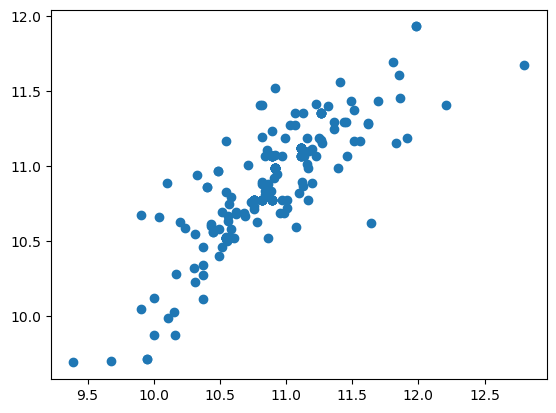

In [61]:
plt.scatter(y_test,y_pred)

# Using Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [63]:
y_pred2= model2.predict(x_test)  
x_pred2= model2.predict(x_train)

In [64]:
mae = metrics.mean_absolute_error(y_test, y_pred2)
mse = metrics.mean_squared_error(y_test, y_pred2)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred2))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 0.1348946246673802
Mean Square Error: 0.0477011322486028
Root Mean Square Error: 0.2184058887681438


In [65]:
r2_score(y_train, x_pred2)

0.9135753862677229

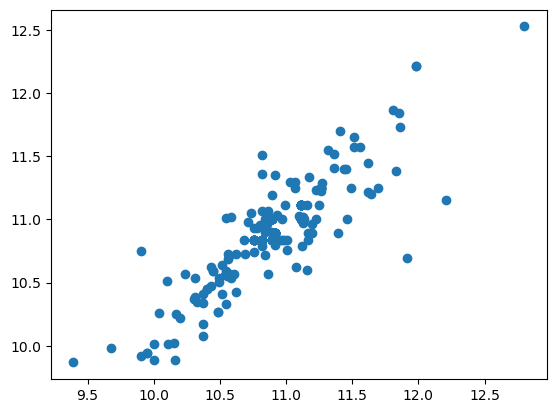

In [66]:
plt.scatter(y_test,y_pred2)

# Using XGBoost Regressor

In [67]:
from xgboost import XGBRegressor
model3=  XGBRegressor()
model3.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [68]:
y_pred3= model3.predict(x_test)  
x_pred3= model3.predict(x_train)

In [69]:
mae = metrics.mean_absolute_error(y_test, y_pred3)
mse = metrics.mean_squared_error(y_test, y_pred3)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred3))

print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 0.1427466516655137
Mean Square Error: 0.060520419389807956
Root Mean Square Error: 0.24600898233562116


In [70]:
r2_score(y_train, x_pred3)

0.9279040457441549